In [56]:
import pandas as pd
import numpy as np

transitions_5_df = pd.read_csv('outputs/pilot_transitions_5months.csv')

In [77]:
transitions_df = pd.read_csv('outputs/pilot_transitions.csv')
df = pd.read_csv('outputs/analysis_lists/all_analysis_week_12.csv')

In [78]:
transitions_df

,Unnamed: 0,user_id,pre-action state,action,post-action state
0,0,2394384,H,No Intervention,L
1,1,2394384,L,Intervention,L
2,2,2394384,L,No Intervention,L
3,3,2394384,L,No Intervention,L
4,4,2394384,L,No Intervention,L
...,...,...,...,...,...
253028,253028,2390819,L,No Intervention,L
253029,253029,2390819,L,No Intervention,L
253030,253030,2390819,L,No Intervention,L
253031,253031,2390819,L,No Intervention,L


In [79]:
transitions_5_df

,Unnamed: 0,user_id,pre-action state,action,post-action state
0,0,2394384,H,No Intervention,H
1,1,2394384,H,No Intervention,L
2,2,2394384,L,No Intervention,L
3,3,2394384,L,No Intervention,L
4,4,2394384,L,No Intervention,L
...,...,...,...,...,...
483058,483058,2390819,L,No Intervention,L
483059,483059,2390819,L,No Intervention,L
483060,483060,2390819,L,No Intervention,L
483061,483061,2390819,L,No Intervention,L


In [80]:
transitions_df.groupby('user_id')['user_id'].count()

user_id
2385611    11
2385612    11
2385613    11
2385614    11
2385615    11
           ..
2409132    11
2409133    11
2409134    11
2409135    11
2409136    11
Name: user_id, Length: 23003, dtype: int64

In [81]:
interv_df = pd.read_csv('outputs/interventions.csv')
interv_df

,Unnamed: 0,user_id,intervene_week,intervene_date,exp_group,cluster,days_since_reg
0,0,2393699,week1,2021-04-29,rmab,1,63
1,1,2387277,week1,2021-04-29,round_robin,10,87
2,2,2401025,week1,2021-04-29,rmab,1,57
3,3,2401025,week3,2021-05-12,rmab,1,70
4,4,2401025,week4,2021-05-18,rmab,1,76
...,...,...,...,...,...,...,...
7180,7180,2395228,week11,2021-07-05,round_robin,16,133
7181,7181,2395195,week11,2021-07-05,round_robin,35,132
7182,7182,2392191,week11,2021-07-05,round_robin,16,133
7183,7183,2394510,week11,2021-07-05,round_robin,35,132


In [76]:
rmab_intervs = interv_df[interv_df['exp_group']=='rmab'].groupby('intervene_week')['user_id'].apply(list)
for week, intervs in zip(rmab_intervs.index, rmab_intervs.values):
    print(week)
    print(intervs)

week1
[2393699, 2401025, 2398556, 2399352, 2398340, 2393884, 2390925, 2402593, 2393621, 2393680, 2404099, 2399732, 2392126, 2399409, 2400214, 2396177, 2398498, 2386375, 2400507, 2398668, 2393687, 2392829, 2408983, 2393242, 2392826, 2409119, 2398061, 2388963, 2407970, 2396730, 2403017, 2407493, 2390132, 2392812, 2386906, 2392236, 2396945, 2400455, 2394384, 2407474, 2395391, 2407041, 2386628, 2402232, 2403058, 2409128, 2390078, 2386418, 2403259, 2389955, 2403138, 2386107, 2396872, 2392613, 2395566, 2389580, 2392202, 2386015, 2386688, 2399053, 2407758, 2407351, 2399504, 2397580, 2388127, 2395407, 2393335, 2398011, 2396006, 2404988, 2391131, 2396477, 2400734, 2404121, 2388931, 2399109, 2391582, 2405065, 2395620, 2403813, 2397097, 2399746, 2404869, 2393646, 2392021, 2407532, 2407289, 2399046, 2399084, 2402309, 2398659, 2398535, 2386737, 2398871, 2408858, 2386362, 2387061, 2390460, 2401827, 2395189, 2385992, 2387635, 2388859, 2399209, 2399501, 2405409, 2395679, 2405531, 2390236, 2391795, 239

In [84]:
with open('policy_dump.pkl', 'rb') as fr:
  pilot_user_ids, pilot_static_features, cls, cluster_transition_probabilities, m_values, q_values = pickle.load(fr)
fr.close()

cluster_transition_probabilities


,cluster,count,"P(E, I, E)","P(E, I, NE)","P(NE, I, E)","P(NE, I, NE)","P(E, A, E)","P(E, A, NE)","P(NE, A, E)","P(NE, A, NE)"
0,0.0,169.0,0.666667,0.333333,0.466667,0.533333,0.153001,0.846999,0.258012,0.741988
1,1.0,83.0,0.600000,0.400000,0.875000,0.125000,0.689132,0.310868,0.294719,0.705281
2,2.0,104.0,0.600000,0.400000,0.631579,0.368421,0.560425,0.439575,0.441054,0.558946
3,3.0,204.0,0.250000,0.750000,0.157895,0.842105,0.000000,1.000000,0.180547,0.819453
4,4.0,129.0,0.333333,0.666667,0.176471,0.823529,0.501182,0.498818,0.048505,0.951495
5,5.0,50.0,0.958333,0.041667,0.985655,0.014345,0.818342,0.181658,0.795455,0.204545
6,6.0,128.0,0.571429,0.428571,0.428571,0.571429,0.419136,0.580864,0.263838,0.736162
7,7.0,53.0,0.947368,0.052632,0.479162,0.520838,0.914069,0.085931,0.288961,0.711039
8,8.0,75.0,0.636364,0.363636,0.545455,0.454545,0.390496,0.609504,0.493551,0.506449
9,9.0,117.0,0.402725,0.597275,0.277778,0.722222,0.250526,0.749474,0.108681,0.891319


In [86]:
tr_df = pd.read_csv('outputs/individual_clustering/weekly_kmeans_transition_probabilities_40.csv')

In [87]:
tr_df['count'].sum()

4238.0

In [6]:
def get_transition_probabilities(beneficiaries, transitions, min_support=1):
    transitions = transitions[transitions['user_id'].isin(beneficiaries)]

    i_transitions = transitions[transitions['action']=='Intervention']
    n_i_transitions = transitions[transitions['action']=='No Intervention']

    i_L = i_transitions[i_transitions['pre-action state']=="L"]
    i_H = i_transitions[i_transitions['pre-action state']=="H"]

    i_L_L = i_L[i_L['post-action state']=="L"]
    i_L_H = i_L[i_L['post-action state']=="H"]

    i_H_L = i_H[i_H['post-action state']=="L"]
    i_H_H = i_H[i_H['post-action state']=="H"]

    n_i_L = n_i_transitions[n_i_transitions['pre-action state']=="L"]
    n_i_H = n_i_transitions[n_i_transitions['pre-action state']=="H"]

    n_i_L_L = n_i_L[n_i_L['post-action state']=="L"]
    n_i_L_H = n_i_L[n_i_L['post-action state']=="H"]

    n_i_H_L = n_i_H[n_i_H['post-action state']=="L"]
    n_i_H_H = n_i_H[n_i_H['post-action state']=="H"]

    transition_probabilities = dict()
    if i_L.shape[0] >= min_support:
        transition_probabilities['P(L, I, L)'] = i_L_L.shape[0] / i_L.shape[0]
        transition_probabilities['P(L, I, H)'] = i_L_H.shape[0] / i_L.shape[0]
    else:
        transition_probabilities['P(L, I, L)'] = np.nan
        transition_probabilities['P(L, I, H)'] = np.nan

    if i_H.shape[0] >= min_support:
        transition_probabilities['P(H, I, L)'] = i_H_L.shape[0] / i_H.shape[0]
        transition_probabilities['P(H, I, H)'] = i_H_H.shape[0] / i_H.shape[0]
    else:
        transition_probabilities['P(H, I, L)'] = np.nan
        transition_probabilities['P(H, I, H)'] = np.nan
    
    if n_i_L.shape[0] >= min_support:
        transition_probabilities['P(L, N, L)'] = n_i_L_L.shape[0] / n_i_L.shape[0]
        transition_probabilities['P(L, N, H)'] = n_i_L_H.shape[0] / n_i_L.shape[0]
    else:
        transition_probabilities['P(L, N, L)'] = np.nan
        transition_probabilities['P(L, N, H)'] = np.nan

    if n_i_H.shape[0] >= min_support:
        transition_probabilities['P(H, N, L)'] = n_i_H_L.shape[0] / n_i_H.shape[0]
        transition_probabilities['P(H, N, H)'] = n_i_H_H.shape[0] / n_i_H.shape[0]
    else:
        transition_probabilities['P(H, N, L)'] = np.nan
        transition_probabilities['P(H, N, H)'] = np.nan

    return transition_probabilities, {'P(L, I, L)': i_L_L.shape[0], 'P(L, I, H)': i_L_H.shape[0], 'P(H, I, L)': i_H_L.shape[0], 'P(H, I, H)': i_H_H.shape[0], 'P(L, N, L)': n_i_L_L.shape[0], 'P(L, N, H)': n_i_L_H.shape[0], 'P(H, N, L)': n_i_H_L.shape[0], 'P(H, N, H)': n_i_H_H.shape[0]}


In [7]:
user_probs, sup = get_transition_probabilities([all_user_ids[0]], transitions_df)


In [8]:
all_probs = pd.DataFrame(columns = ['user_id'] + list(user_probs.keys()))
for user_id in tqdm(all_user_ids):
        user_probs, sup = get_transition_probabilities([user_id], transitions_df, 1)
        user_probs['user_id'] = user_id
        all_probs = all_probs.append(user_probs, ignore_index=True)

100%|██████████| 23003/23003 [03:27<00:00, 110.93it/s]


In [12]:
transitions_df

,Unnamed: 0,user_id,pre-action state,action,post-action state
0,0,2394384,H,No Intervention,H
1,1,2394384,H,No Intervention,L
2,2,2394384,L,No Intervention,L
3,3,2394384,L,No Intervention,L
4,4,2394384,L,No Intervention,L
...,...,...,...,...,...
483058,483058,2390819,L,No Intervention,L
483059,483059,2390819,L,No Intervention,L
483060,483060,2390819,L,No Intervention,L
483061,483061,2390819,L,No Intervention,L


In [9]:
all_probs

,user_id,"P(L, I, L)","P(L, I, H)","P(H, I, L)","P(H, I, H)","P(L, N, L)","P(L, N, H)","P(H, N, L)","P(H, N, H)"
0,2394384.0,1.0,0.0,NaN,NaN,0.933333,0.066667,0.400000,0.600000
1,2388891.0,NaN,NaN,NaN,NaN,0.000000,1.000000,0.050000,0.950000
2,2404208.0,NaN,NaN,NaN,NaN,0.666667,0.333333,0.444444,0.555556
3,2388931.0,NaN,NaN,0.0,1.0,0.750000,0.250000,0.500000,0.500000
4,2392202.0,NaN,NaN,0.0,1.0,NaN,NaN,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
22998,2400463.0,NaN,NaN,NaN,NaN,0.000000,1.000000,0.050000,0.950000
22999,2398012.0,NaN,NaN,NaN,NaN,0.000000,1.000000,0.050000,0.950000
23000,2397484.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
23001,2397539.0,NaN,NaN,NaN,NaN,0.333333,0.666667,0.166667,0.833333


In [46]:
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(theme='solarizedl')


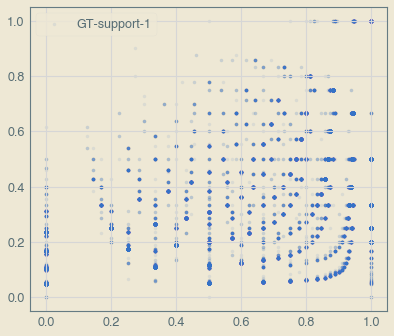

In [47]:
import matplotlib.pyplot as plt
plt.scatter(all_probs['P(L, N, L)'], all_probs['P(H, N, L)'], s=10, label='GT-support-1', alpha=0.1)
# plt.scatter(gt[:, 0], gt[:, 1], s=10, label='GT-support-3', alpha=0.1)
plt.legend()

In [27]:
all_probs[all_probs['P(L, N, L)'].isna()]

,user_id,"P(L, I, L)","P(L, I, H)","P(H, I, L)","P(H, I, H)","P(L, N, L)","P(L, N, H)","P(H, N, L)","P(H, N, H)",user_id
4,2392202.0,NaN,NaN,0.0,1.0,NaN,NaN,0.0,1.0,2392202.0
7,2394704.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2394704.0
11,2392184.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2392184.0
15,2405531.0,NaN,NaN,0.0,1.0,NaN,NaN,0.0,1.0,2405531.0
16,2398556.0,NaN,NaN,0.0,1.0,NaN,NaN,0.0,1.0,2398556.0
...,...,...,...,...,...,...,...,...,...,...
22982,2399484.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2399484.0
22984,2396051.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2396051.0
22991,2392937.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2392937.0
22997,2400456.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2400456.0


In [53]:
analysis_df = pd.read_csv('outputs/analysis_lists/all_big_analysis_week_12.csv')
analysis_df.shape


(23003, 31)

In [50]:
transitions_df['user_id'].value_counts().describe()

count    23003.0
mean        21.0
std          0.0
min         21.0
25%         21.0
50%         21.0
75%         21.0
max         21.0
Name: user_id, dtype: float64